## 4. Exploratory Data Analysis

#### Importing Neccessary Libraries and Dataset

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.externals import joblib
from sklearn.linear_model import Ridge
import missingno as msno

In [2]:
df = pd.read_csv('coffee.csv')
print('The Shape of dataset is: ',df.shape)
df.head(3)

The Shape of dataset is:  (1311, 44)


,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


A section of dataset is printed as above. It seems there are NAN values in the dataset. So, we'll study NAN values distribution in different columns of dataset. We'll see the all the columns with its data type and number of non-Null values below.

The DataFrame.info() method is called to print all the columns with their respective data type and number of non-Null columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

#### Columns with most number of NAN values and Visualizing NAN values distribution by each Columns

In [4]:
print('Top 5 Columns with most number of NAN Values')
pd.DataFrame((df.isna().sum()).sort_values(ascending=False), columns=
             ['No. of NAN Valued Rows']).head(5)

Top 5 Columns with most number of NAN Values


,No. of NAN Valued Rows
Lot.Number,1041
Farm.Name,356
Mill,310
Producer,230
altitude_low_meters,227


<AxesSubplot:>

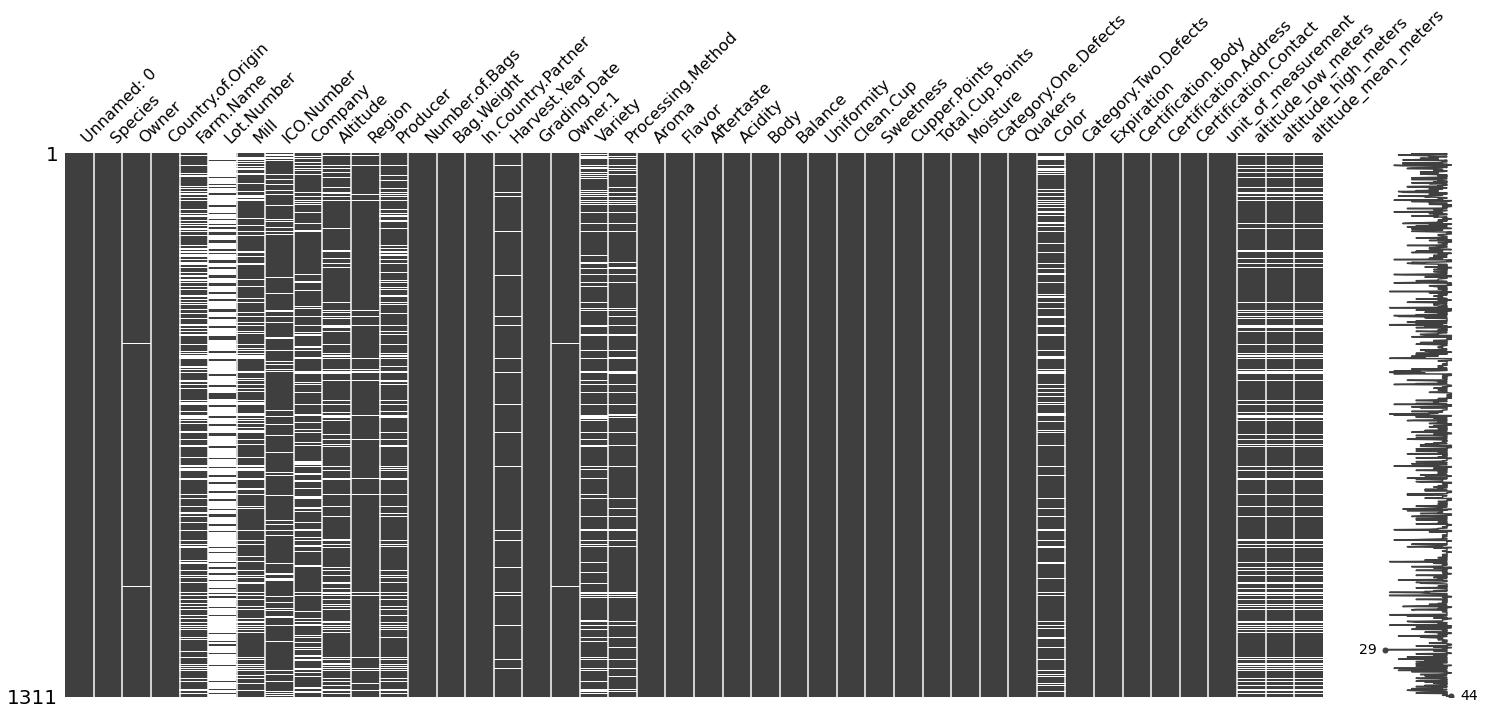

In [5]:
msno.matrix(df)

From above table and missingno matrix graph, it seems there are 1041 of NAN values in 'Lot.Number', 356 in 'Farm.Name', and 310 in 'Mill'. 'Lot.Number' seems the identification number, Farm.Name and Mill are the categorical variables. 'Lot.Number' have no impact in the Target Aftertaste and other two features are very difficult to impute. So, we'll omit in our final dataset. 

#### How Processing Method is affecting the Aftertaste?

Categories Distribution in Processing Method 
                             Count
Washed / Wet                 812
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14


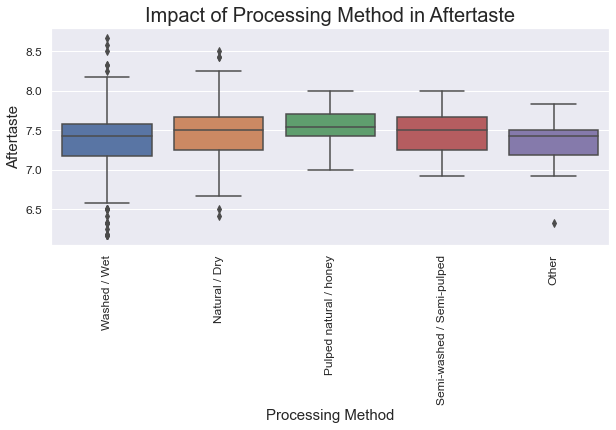

In [6]:
sns.set(style='darkgrid')
pf = pd.DataFrame(df['Processing.Method'].value_counts())
pf.columns = ['Count']
print('Categories Distribution in Processing Method \n ',pf)
plt.figure(figsize=(10,4))
sns.boxplot(x = df['Processing.Method'], y = df['Aftertaste'])
plt.title('Impact of Processing Method in Aftertaste', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Aftertaste', fontsize=15)
plt.xlabel('Processing Method', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Washed/Wet is the most common Processing Method used followed by Natural/Dry and Semi-washed/Semi-pulped while processing the raw coffee. From above boxplot, it seems that the median Aftertaste value is around 7.5 and interquartile range are not so wide for different processing methods. Due to this less variation, the Processing Method has very less impact in Aftertaste quality of Coffee.

#### How Coffee Color is affecting the Aftertaste?

Categories Distribution in Color 
                count
Green           850
Bluish-Green    112
Blue-Green       82
None             51


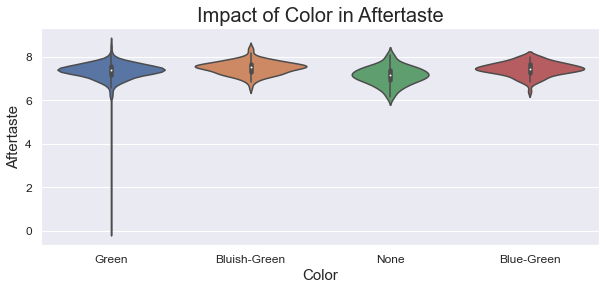

In [7]:
sns.set(style='darkgrid')
cf = pd.DataFrame(df['Color'].value_counts())
cf.columns = ['count']
print('Categories Distribution in Color \n ', cf)
plt.figure(figsize=(10,4))
sns.violinplot(x = df['Color'], y = df['Aftertaste'])
plt.title('Impact of Color in Aftertaste', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Aftertaste', fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.show()

Most of the coffee are Greeen in Color and there are many outliers in Green Coffee. From above violinplot, the median value for Aftertaste for different color is in very close range. Since the dataset is skewed towards green and due to low variation in target variable for different colors of Coffee, we discard this feature from modeling purpose.

#### How is Aftertaste scenario from top processing Mills ?

Mills which processes most coffee 
                       No.of Processes
beneficio ixchel                  90
dry mill                          39
trilladora boananza               38
ipanema coffees                   16
neiva                             15


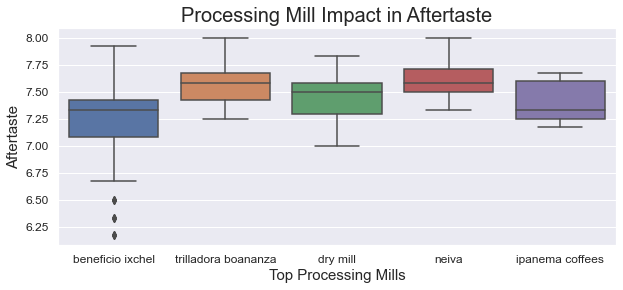

In [8]:
mill = list(df['Mill'].value_counts().sort_values(ascending=False
                                                 )[:5].index.values)
xf = (df[df['Mill'].isin(mill) ])
ff = pd.DataFrame(xf['Mill'].value_counts())
ff.columns = ['No.of Processes']
sns.set(style='darkgrid')
print('Mills which processes most coffee \n ', ff)
plt.figure(figsize=(10,4))
sns.boxplot(x = xf['Mill'], y = xf['Aftertaste'])
plt.title('Processing Mill Impact in Aftertaste', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Aftertaste', fontsize=15)
plt.xlabel('Top Processing Mills', fontsize=15)
plt.show()

Though the Mill column have lots of NULL values, the top processing mills are extracted and coffee Aftertaste from those respective Mills are analyzed. From the table, the top coffee processing mills are beneficio ixchel, dry mill, trilladora boananza, ipanema coffees, and neiva. The coffee Aftertaste value from these top five processing mills are analyzed from box plot, it seems median value is around 7.25 to 7.625. The beneficio ixchel mill have outliers for Aftertaste. From this analysis, this Mill feature seems irrelevant about Coffee Aftertaste and it comprises many null values, we're not considering this feature in visualization and modeling part.

#### Feature Extraction:
Extracting the total quantity of coffee produced and droping the individual columns. This is done to calculate the total quantity of coffeee produced in by the farm. Since, the 'Bag.Weight' columns have listed the values in terms of kgs and lbs. We have to extract numerical value from those value having 'kg' abd 'lbs' strings. The value with 'lbs' string is converted into equialent kilogram by multiplying by 0.453592. After this, the Bag.Weight is multiplied by Number.of.Bags to get total quantity of coffee produced. This feature extraction is done so as to check how coffee prodcution is affecting the Aftertaste quality of Coffee.

In [9]:
bag_weight = []
for item in df['Bag.Weight']:
    if ' kg,lbs' in item:item = int(item.replace(' kg,lbs', ''))
    elif ' kg' in item:item = int(item.replace(' kg', ''))
    elif ' lbs' in item:
        item = int(item.replace(' lbs', ''))
        item = 0.453592*item 
    elif ',lbs' in item:
        item = int(item.replace(',lbs', ''))
        item = 0.453592*item
    else:item = int(item)
    bag_weight.append(item)
df['Bag.Weight'] = pd.Series(bag_weight)
df['Total Quantity Produced kg'] = df['Number.of.Bags']*df['Bag.Weight']
df.drop(['Number.of.Bags', 'Bag.Weight'], axis=1, inplace = True)

#### Dataset Summary

In [10]:
df.describe().loc[:,'Aroma':'Cupper.Points']

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000
mean,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864
std,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000


The mean value of Aftertaste is 7.397 from 1311 values, with standard deviation 0.4051, minimum value is 0 and maximum is 8.7. Most of the columns Uniformity, CleanCup, and Sweetness has values clustered around 10.Despite of this, we studied their individual correlation with Aftertaste and considered this point in the visualization part of these data. 

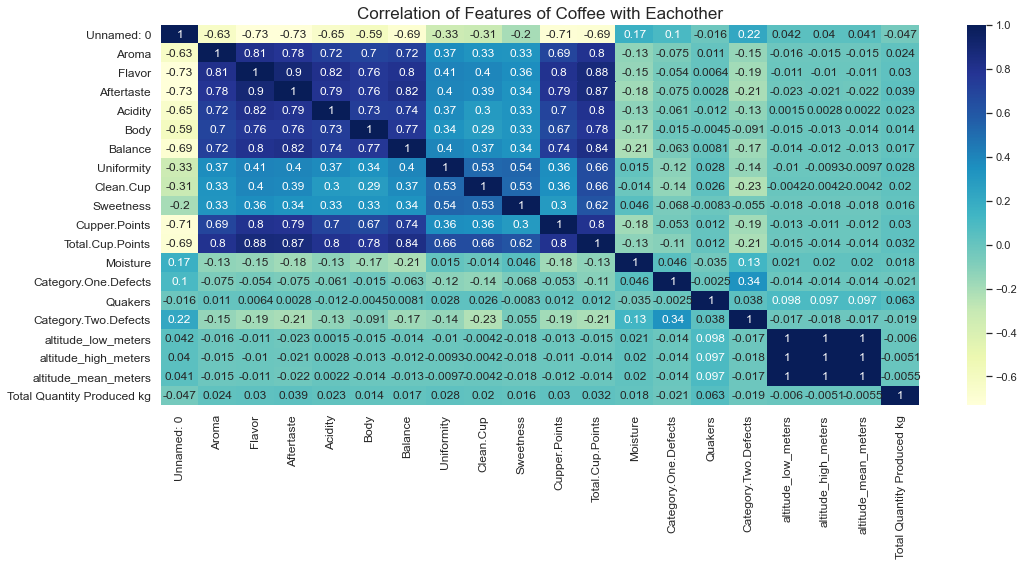

In [11]:
plt.figure(figsize=(17,7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation of Features of Coffee with Eachother', fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The target variable 'Aftertaste' is highly correlated with Flavor, Balance, Acidity, CupperPoints, Aroma, Body. It has moderate correlation with Uniformity, CleanCup, Sweetness, Moisture, and CategoryTwoDefects. Our inital thoughts from the motivation part seems to be true for some features. Furthermore, we'll visualize each above features against Aftertaste, how these features impact the Aftertaste, and discover the most important features for Model Fitting.

# 

# 

#### Outlier Treatment
Removing the outlier which might affect the quality of our data. There is one outlier which has most of coffee quality features as 0. It seems it is irrelevant data. So, we omit this row. Same for 'Acidity' and 'Body' feature having values less than 5.50.

In [12]:
df = df[df['Flavor']!=0]
df = df[df['Acidity']>5.50]
df = df[df['Body']>5.50]

#### Counting of Countries

In [13]:
df_countries = pd.DataFrame(df['Country.of.Origin'].value_counts()
                           ).reset_index()
df_countries.columns = ['Country', 'No. of Coffee Farms']
df_countries.head(5)

,Country,No. of Coffee Farms
0,Mexico,236
1,Guatemala,181
2,Colombia,181
3,Brazil,132
4,Taiwan,75


Mexico has the maximum number of coffee farms, followed by Guatemala, Columbia, Brazil and Taiwan respectively.

#### Analyzing Region with Coffee Farms

In [14]:
df_region = pd.DataFrame(df['Region'].value_counts()).reset_index()
df_region.columns = ['Region Name', 'No. of Farms']
print(df_region.head(2))
a = list(df_region.head(1)['Region Name'])
a = list(df[df['Region'] == a[0]]['Country.of.Origin'])
print('Huila lies in, '+str(a[0]))

  Region Name  No. of Farms
0       huila           112
1     oriente            80
Huila lies in, Colombia


The Huilia region in Columbia has 112 coffee farms which is more than 60% of the total number of farms in the country.

#### Dropping the columns with many NAN values and which we're not going to use in Analysis

In [15]:
all_set = set(df.columns)
list_take = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 
             'Uniformity', 'Clean.Cup', 'Sweetness', 
             'Cupper.Points', 'Moisture', 'Category.Two.Defects']
set_take = set(list_take)
set_drop = all_set.difference(set_take)
print('The following features are considered for further processes: \n')
df = df[list_take]
df.info()

The following features are considered for further processes: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1309
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aroma                 1308 non-null   float64
 1   Flavor                1308 non-null   float64
 2   Aftertaste            1308 non-null   float64
 3   Acidity               1308 non-null   float64
 4   Body                  1308 non-null   float64
 5   Balance               1308 non-null   float64
 6   Uniformity            1308 non-null   float64
 7   Clean.Cup             1308 non-null   float64
 8   Sweetness             1308 non-null   float64
 9   Cupper.Points         1308 non-null   float64
 10  Moisture              1308 non-null   float64
 11  Category.Two.Defects  1308 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 132.8 KB


Since, we remove outliers. The total number or rows reduced  to 1308 and columns to 12. From above listing, it shows no null values  in the dataset. It seems further visualization and model fitting can be done in this set. 

In [16]:
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Category.Two.Defects
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,1
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,2
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,2


This is the final glimpse of our dataset with features and target Aftertaste after EDA. We're analyzing these above features against Aftertaste in visualization part.

## 5. Visualization

#### Aftertaste analysis using Moisture and Category Two Defects of Coffee

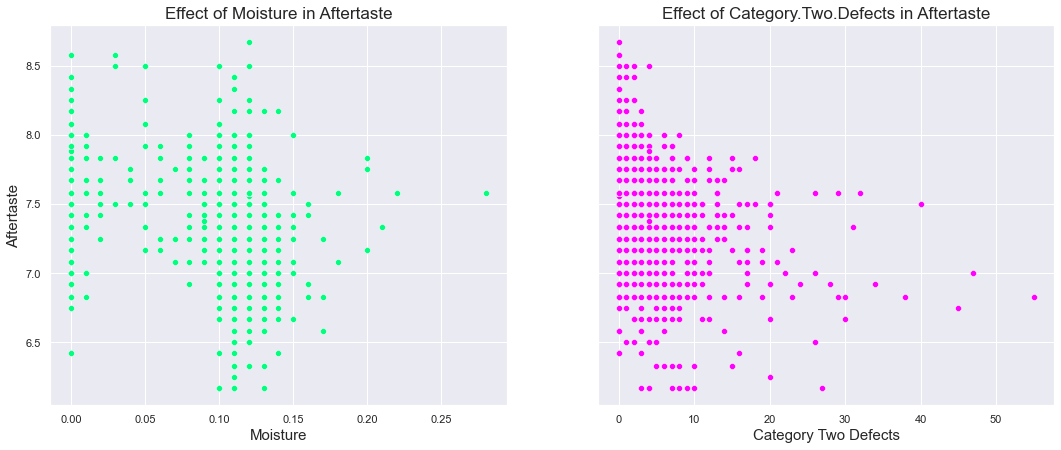

In [17]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
sns.scatterplot(x = 'Moisture', y = 'Aftertaste', data = df, color='springgreen',
                ax=axes[0])
axes[0].set_title('Effect of Moisture in Aftertaste', fontsize=17)
axes[0].set_xlabel('Moisture',fontsize=15)
axes[0].set_ylabel('Aftertaste',fontsize=15)
sns.scatterplot(x = 'Category.Two.Defects', y = 'Aftertaste', data = df,
                color='magenta', ax=axes[1])
axes[1].set_title('Effect of Category.Two.Defects in Aftertaste', 
                  fontsize=17)
axes[1].set_xlabel('Category Two Defects',fontsize=15)
plt.show()

In above first graph, it is clearly visible that the data points are scattered randomly. The moisture has no distinct impact in Aftertaste. It seems the correlation between them is not sufficient to assist while Model Fitting. Using this feature, it will only add noise to our dataset and might overfit our model. 
In second graph, low the value of Category Two Defects in coffee, higher is the value of Aftertaste. But this trend is only valid for some of the data. Most of the data though they have lower value of Category Two Defects, they also have lower value of Aftertaste. The earlier pattern by Category Two Defects with Aftertaste is useful but the latter case is dominant. Using this feature it makes our final data more noisy and high chances of overfitting our model.

#### Aftertaste analysis using Uniformity, CleanCup, and Sweetness

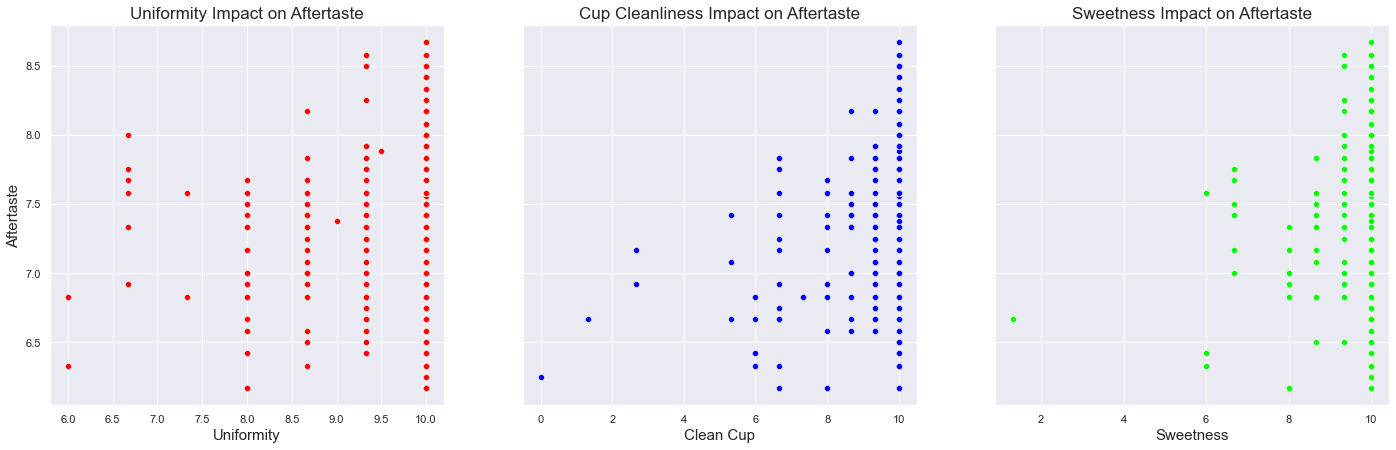

In [18]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(24, 7), sharey=True)
sns.scatterplot(x = 'Uniformity' , y = 'Aftertaste', data = df, ax=axes[0], 
                color = 'red')
axes[0].set_title('Uniformity Impact on Aftertaste', fontsize=17)
axes[0].set_xlabel('Uniformity',fontsize=15)
axes[0].set_ylabel('Aftertaste',fontsize=15)
sns.scatterplot(x = 'Clean.Cup' , y = 'Aftertaste', data = df, ax = axes[1], 
                color = 'blue')
axes[1].set_title('Cup Cleanliness Impact on Aftertaste', fontsize=17)
axes[1].set_xlabel('Clean Cup',fontsize=15)
sns.scatterplot(x = 'Sweetness' , y = 'Aftertaste', data = df, ax=axes[2], 
                color='lime')
axes[2].set_title('Sweetness Impact on Aftertaste', fontsize=17)
axes[2].set_xlabel('Sweetness',fontsize=15)
plt.show()

Earlier while we summarize the dataset, we found that Uniformity, CleanCup, and Sweetness have values centered around 10. Though these features are centered around 10, their correlation with Aftertaste was moderate. So, we considered this features in our dataset earlier. In first graph, most of values of Uniformity are centered around 10 and others are also randomly scattered. In second graph, the case is similar most of its values are around 10, randomly scattered with no visual relation. Also, the CleanCup have zero value which seems to be as outlier. In third graph, the data pattern is  similar to above graph patterns. Like CleanCup it also included one outlier. From the visual inspection of above graphs, these features have most of their values centered around 10 this will create imbalanceness in our final dataset and other points are randomly scattered. Thus, using these less variant and imbalanced features, our model complexity only increases.

#### Impact of Aroma and Body in Aftertaste of Coffee

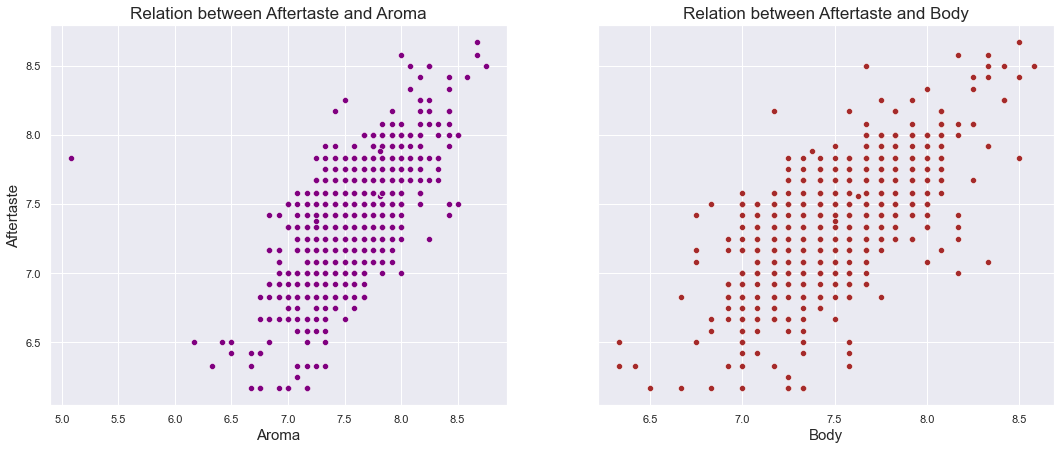

In [19]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
sns.scatterplot(x = 'Aroma', y = 'Aftertaste', data =df, ax=axes[0], 
                color='purple')
axes[0].set_title('Relation between Aftertaste and Aroma', fontsize=17)
axes[0].set_xlabel('Aroma', fontsize=15)
axes[0].set_ylabel('Aftertaste', fontsize=15)
sns.scatterplot(x = 'Body', y = 'Aftertaste', data = df, ax=axes[1], 
                color='brown')
axes[1].set_title('Relation between Aftertaste and Body', fontsize=17)
axes[1].set_xlabel('Body', fontsize=15)
plt.show()

The correlation of Aroma with Aftertaste is 0.78 which can be viewd in Correlation Heatmap. Thus, relation between Aroma and Aftertaste is visualized in above first graph. The values of Aftertaste with Aroma is positively inclined, the datapoints are densed and almost all their values reside above 5. This pattern we obtain from above graph and EDA correlation heatmap can be useful in our further process. So, we'll use this feature in our final dataset.
Similary, the second graph also tells there is quite positive correlation between Body and Aftertaste. From heatmap, the correlation between them is 0.76 which is quite positive. Unlike first graph, the data points are bit more sparse. We consider this feature for further process. We'll study how both of this feature impact our final model based upon the model performance in training and testing data. 

#### Impact of Cupper Points and Balance in Aftertaste

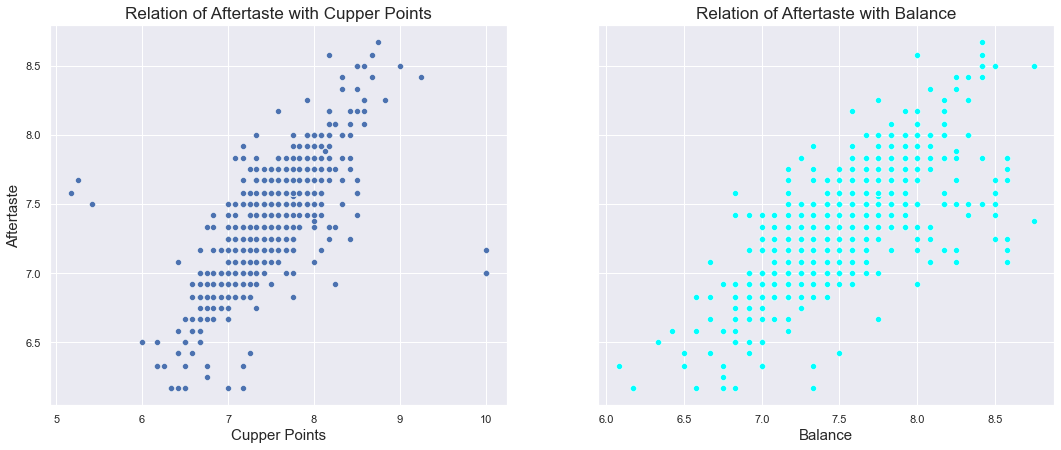

In [20]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
sns.scatterplot(x = 'Cupper.Points' , y = 'Aftertaste', data = df, 
                ax=axes[0])
axes[0].set_title('Relation of Aftertaste with Cupper Points', 
                  fontsize=17)
axes[0].set_xlabel('Cupper Points', fontsize=15)
axes[0].set_ylabel('Aftertaste', fontsize=15)
sns.scatterplot(x = 'Balance' , y = 'Aftertaste', data = df, ax = axes[1], 
                color='cyan')
axes[1].set_title('Relation of Aftertaste with Balance', fontsize=17)
axes[1].set_xlabel('Balance', fontsize=15)
plt.show()

In above first graph, Aftertaste is positively correlated with CupperPoints. From EDA heatmap, the correlation value between them is 0.79. Most of the data points are dense and reside along a line while some points are sparse and only few points are very far away. This strong relation can provide meaningful insights while training a model.
The correlation value between Balance and Aftertaste is 0.82. From the second graph, the datapoints are along a positivly inclined line. The data points are less dense than the first graph. As the value of CupperPoints and Balance increases, Aftertaste also increases along. Thus, we'll use both these features in our final dataset.

#### Impact of Acidity and Flavor in Aftertaste

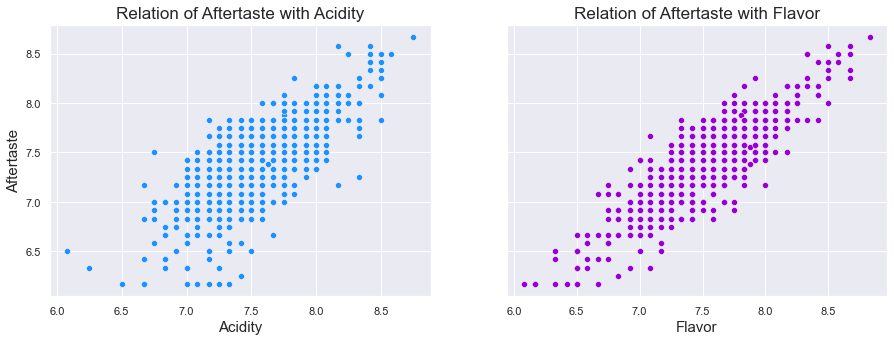

In [21]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.scatterplot(x = 'Acidity' , y = 'Aftertaste', data = df, ax = axes[0],
                color='dodgerblue')
axes[0].set_title('Relation of Aftertaste with Acidity', fontsize=17)
axes[0].set_xlabel('Acidity', fontsize=15)
axes[0].set_ylabel('Aftertaste', fontsize=15)
sns.scatterplot(x = 'Flavor', y= 'Aftertaste', data=df, ax=axes[1], 
                color='darkviolet')
axes[1].set_title('Relation of Aftertaste with Flavor', fontsize=17)
axes[1].set_xlabel('Flavor', fontsize=15)
plt.show()

In Correlation Heatmap of EDA, the Acidity feature has a correlation of 0.79 and Flavor has correlation of 0.9 with Aftertaste. While reading some articles and papers, Acidity and Flavor affects Aftertaste of coffee significantly. So, we've considered these features earlier for further processes. In first scatter plot above, there is positive relation between Acidity and Aftertaste. As acidity in coffeee increases its Aftertaste also increases. In second graph, like the correlation value between Flavor and Aftertaste, they have strong positive correlation in data points as well. Unlike the first graph, the Flavor datapoints with Aftertaste are more dense. Among analysis of different features, the data points in this is the most dense along the straight line. So, it is one of the most important features that will have impact in coffee Aftertaste quality. While model fitting, we'll use these both features.

#### Making and Saving the Final Dataset

In [22]:
final_df = df[['Aroma', 'Flavor', 'Aftertaste', 'Body', 'Balance', 'Uniformity',
               'Clean.Cup', 'Sweetness', 'Cupper.Points',
               'Acidity']]
final_df.to_csv('df_final.csv',index=False)

#### Visualizing Level of Importance for Diffenrent Features

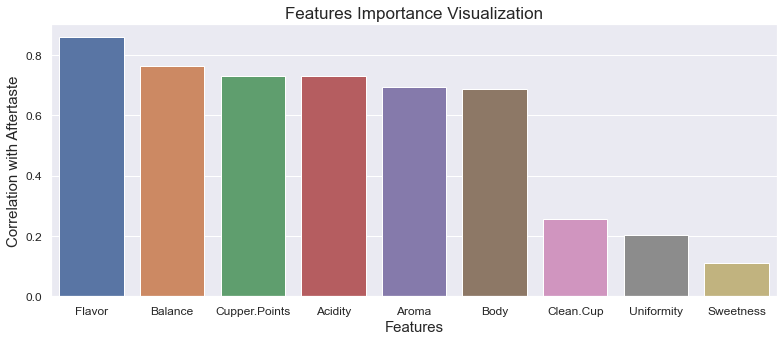

In [23]:
dc = final_df.corr()
dc = pd.DataFrame(dc.loc[:,"Aftertaste"].sort_values(ascending=False)[1:]
                 ).reset_index()
plt.figure(figsize=(13,5))
sns.set(style='darkgrid')
sns.barplot(x = dc['index'],y=dc['Aftertaste'])
plt.title('Features Importance Visualization', fontsize=17)
plt.xlabel('Features', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Correlation with Aftertaste', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

The most important correlated features with Aftertaste are Flavor, Balance, CupperPoints, Acidity, Aroma, and Body. So, we'll use these features in model fitting. It seems the overall Aftertaste is mostly impacted by Flavor, Balance, CupperPoints, and Acidity.

## 6. Discussion

The initial raw dataset has 44 columns of different data types and 1311 observations. The previous index of the dataset appears to be imported as a feature named 'Unnamed:0'. The data types in the dataframe are integer, object, and float. Most of the columns have NAN values. Almost 17 columns consist of NAN values. Lot Number, Farm Name, Mill, Producer are the top four columns with the maximum number of NAN values. Different Categorical features importance are tested against Aftertaste to check how these features impact the overall Aftertaste quality of a coffee. We considered only those which might affect the Aftertaste and those features were Processing Method, Color of coffee, and Mill processing the coffee. In Processing Method, the most commonly used is ‘Washed/Wet’. The Aftertaste seems to be independent of the Processing Method. Similarly in Color, the most common coffee color is Green followed by Bluish-Green. The Aftertaste value is less variant regarding the color of the coffee. Though Mill has lots of NAN values, it is tested against Aftertaste, the result is close to previous results. Total coffee produced in Kg is extracted from total bags of coffee produced and each bag weight for testing impact of quantity of coffee produced in Aftertaste. It was fount that it doesn't affect the Aftertaste quality of coffee.

From the correlation heatmap, it was found that the ‘Aftertaste’ attribute for determining the coffee quality is highly correlated with Aroma, Flavor, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness, Cupper Points, Moisture, and Category Two Defects. Some outliers that appear in the boxplots and tables are removed. It was also found that no categorical features directly impact Aftertaste. The above features are taken along with Aftertaste in the dataset for further processes. Additionally, there is the highest number of coffee farms in Mexico followed by Columbia, Guatemala, and Brazil. The region Huila of Columbia has the highest number of Coffee Farms which is 112 and it is located. Almost 61% of Columbian coffee farms are located in the Huila region.

The dataset contains 12 columns including Aftertaste, and the number of rows reduced to 1308. Out of 12 columns, 11 are float and the remaining one Category Two Defect column is an integer. Though Moisture and Category Two Defects are correlated to Aftertaste to some extent, in graphs the data points are randomly scattered. The Uniformity, Clean Cup, and Sweetness also have a similar case. Most of their values are centered around 10 making the dataset imbalanced. The features Aroma, Body, Cupper Points, Balance, Acidity, and Flavor are positively correlated with Aftertaste and they are considered as important features. Their data points are along the line when we plot them against Aftertaste. Thus, they are taken in while fitting the model. From the heatmap, the correlation value of Flavor with Aftertaste is 0.9 and in the graph, the data points are mostly dense along a straight line. So, it is the most important feature that impacts Aftertaste significantly.

## 7. Model Fitting

#### a. Model Fitting with Six Features

In Model Fitting, the features Aroma, Acidity, CupperPoints, Flavor, Balance, and Body are used.The model fitting is going to be in two distinct ways for six machine learning algorithms.
In first way, all the six features are taken as input features for output target Aftertaste while training the model.

The dataset is splitted into X as input features and y of Aftertaste as target. They are splited into training set and testing set, 75% is training set and remaining 25% is testing set. The list training_acc and testing_acc are initialized to store the training accuracy and testing acuracy in terms of R2 value for the respective ML Algorithms of algorithms list.

In [24]:
df = pd.read_csv('df_final.csv')
X = df[['Aroma', 'Acidity', 'Cupper.Points', 'Flavor','Balance', 'Body']]
y = df['Aftertaste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
algorithms = ['LinearRegression', 'Decision Tree', 'Random Forest',
              'KNNeighbors', 'SupportVM', 'XGB']
training_acc = []
testing_acc = []

The values of X_train and y_train are used in training the respective models. When a model is trained, its training accuracy and testing accuracy is calculated using model.score() method and stored  sequentially in the respective accuracy storing lists.

In [25]:
# Linear Regression
model_lr = LinearRegression(normalize=True)
model_lr.fit(X_train, y_train)
training_acc.append(model_lr.score(X_train, y_train))
testing_acc.append(model_lr.score(X_test, y_test))
#Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
training_acc.append(model_dt.score(X_train, y_train))
testing_acc.append(model_dt.score(X_test, y_test))

In [26]:
#Random Forest
model_rf = RandomForestRegressor(max_depth=5)
model_rf.fit(X_train, y_train)
training_acc.append(model_rf.score(X_train, y_train))
testing_acc.append(model_rf.score(X_test, y_test))
#KNN
model_knn = KNeighborsRegressor(n_neighbors=7)
model_knn.fit(X_train, y_train)
training_acc.append(model_knn.score(X_train, y_train))
testing_acc.append(model_knn.score(X_test, y_test))
#SVM
model_svr = SVR()
model_svr.fit(X_train, y_train)
training_acc.append(model_svr.score(X_train, y_train))
testing_acc.append(model_svr.score(X_test, y_test))
#XGBoost
model_x = XGBRegressor(n_estimators = 25, max_depth=2)
model_x.fit(X_train, y_train)
training_acc.append(model_x.score(X_train, y_train))
testing_acc.append(model_x.score(X_test, y_test))

#### b. Model Fitting with Four Features

The most important four features that includes Flavor, Balance, Acidity, and Cupper Points are taken in X whereas the target Aftertaste is taken as y. In similar fashion to first way, the training and testing sets are prepared. The respective models are trained using less features, corresponding training and testing accuracy are calculated using model.score() method. These values are stored in training_accl and testing_accl lists.

In [27]:
df = pd.read_csv('df_final.csv')
X = df[['Flavor','Balance', 'Acidity', 'Cupper.Points']]
y = df['Aftertaste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
algorithms = ['LinearRegression', 'Decision Tree', 'Random Forest', 
              'KNNeighbors', 'SupportVM', 'XGB']
training_accl = []
testing_accl= []
# Linear Regression
model_lr = LinearRegression(normalize=True)
model_lr.fit(X_train, y_train)
training_accl.append(model_lr.score(X_train, y_train))
testing_accl.append(model_lr.score(X_test, y_test))
#Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
training_accl.append(model_dt.score(X_train, y_train))
testing_accl.append(model_dt.score(X_test, y_test))
#Random Forest
model_rf = RandomForestRegressor(max_depth=5)
model_rf.fit(X_train, y_train)
training_accl.append(model_rf.score(X_train, y_train))
testing_accl.append(model_rf.score(X_test, y_test))
#KNN
model_knn = KNeighborsRegressor(n_neighbors=7)
model_knn.fit(X_train, y_train)
training_accl.append(model_knn.score(X_train, y_train))
testing_accl.append(model_knn.score(X_test, y_test))
#SVM
model_svr = SVR()
model_svr.fit(X_train, y_train)
training_accl.append(model_svr.score(X_train, y_train))
testing_accl.append(model_svr.score(X_test, y_test))

In [28]:
#XGBoost
model_x = XGBRegressor(n_estimators = 25, max_depth=2)
model_x.fit(X_train, y_train)
training_accl.append(model_x.score(X_train, y_train))
testing_accl.append(model_x.score(X_test, y_test))

## 8. Model Evaluation

#### a. Evaluation of Models with Six Features

The bargraph of training accuracy of respective algorithms are drawn. For testing accuracy, a line plot with red color is drawn as shown below:

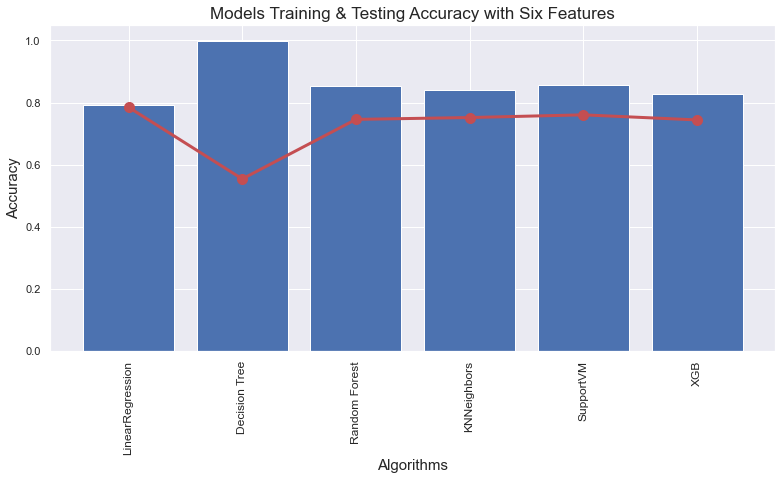

In [29]:
plt.figure(figsize=(13,6))
ax = plt.bar(algorithms,training_acc)
plt.plot(algorithms, testing_acc, color='r', lw=3, marker='o', ms=10)
plt.xticks(rotation='vertical', fontsize=12)
plt.title('Models Training & Testing Accuracy with Six Features', fontsize=17)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

In above graph, the decision tree have highest training accuracy and lowest testing accuracy. Similarly, Linear Regression, Random Forest, K-Nearest Neigbors (KNN), Support Vector Machine (SVM), and Extreme Gradient Boosting (XGB) have the training accuracy much higher than the testing accuracy. All these models are doing well in training data i.e., seen data but when unseen data like test data is fed into the model its performance is low. This is clearly the case of Overfitting.

The above graphical data is presented in the following table to make our analysis more accurate quantitatively.

In [30]:
model_evaluation = pd.DataFrame(data = {'Model': algorithms, 
                                        'Training Accuracy':training_acc, 
                                        'Testing Accuracy': testing_acc})
model_evaluation.head(10)

,Model,Training Accuracy,Testing Accuracy
0,LinearRegression,0.793943,0.785178
1,Decision Tree,0.999308,0.554551
2,Random Forest,0.853453,0.746092
3,KNNeighbors,0.841078,0.752061
4,SupportVM,0.857431,0.760701
5,XGB,0.827609,0.744328


From above table, Decision tree performs worst in unseen i.e testing data. So, it is the most overfitted model. All the have training accuracy much higher than the testing accuracy except Linear Regression. Thus, except Linear Regression all models are overfitted.

#### b. Evaluation of Models with Four Features

The bargraph of training accuracy of respective models with four features are drawn. For testing accuracy, a line plot with red color is drawn as shown below:

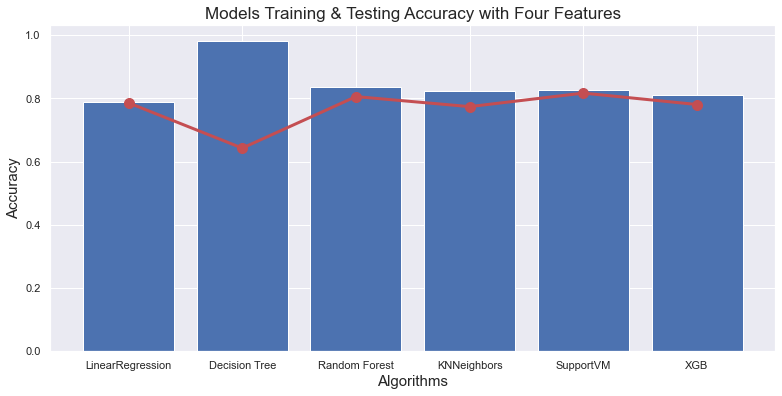

In [31]:
plt.figure(figsize=(13,6))
ax = plt.bar(algorithms,training_accl)
plt.plot(algorithms, testing_accl, color='r', lw=3, marker='o', ms=10)
plt.title('Models Training & Testing Accuracy with Four Features', 
          fontsize=17)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

In above graph, the decision tree have highest training accuracy and lowest testing accuracy. So, the decision tree is clearly overfitted. The other models Linear Regression, Random Forest, K-Nearest Neighbor, Support Vector Machine, and Extreme GB have close training and testing accuracy. 
All these models are compared accurately in the following table.

# 

# 

# 

# 

In [35]:
model_evaluation = pd.DataFrame(data = {'Model': algorithms, 
                                        'Training Accuracy': training_accl,
                                        'Testing Accuracy': testing_accl})
model_evaluation.head(10)

,Model,Training Accuracy,Testing Accuracy
0,LinearRegression,0.787702,0.786115
1,Decision Tree,0.983082,0.642896
2,Random Forest,0.836925,0.805925
3,KNNeighbors,0.823304,0.774190
4,SupportVM,0.827342,0.817007
5,XGB,0.810522,0.780822


The problem of overfitting is solved in most of the models trained with four features. Still decision tree is largely overfitted and it is avoided for further pocesses. From above table the Support Vector Machine have highest Testing Accuracy, and pretty good Training Accuracy which means it is performing better in both seen and unseen data. So, the model_svr trained with four features is the best model out of all models.

#### Saving SVM model trained with four features

In [33]:
joblib.dump(model_svr, 'model_svm.pkl')

['model_svm.pkl']